In [109]:
import pandas as pd
import numpy as np
from datetime import datetime
import IPython
import warnings
from IPython import display
warnings.filterwarnings('ignore')
from subprocess import check_output
%matplotlib inline

In [115]:
data_row = pd.read_csv('wtdata_1_11_2011')

In [118]:
def cleaner(df):
    
    for i in df.index: # change '-' str-type to None
        for j in df.columns:
            if df.at[i,j] == '-':
                df.at[i,j] = None
   
    new_columns = ['None', 'time', 'river_train', 'PoC', 'Jungle', 'BSM', 'SGallery', 'Beartheater', 'Steamship', 'Mt_Splash', 'HoneyHunt', 'Haunted', 'Alice', 'SmallWorld', 'Carousel', 'Cinderella', 'Pinocchio', 'Pan', 'Philharmagic', 'Snowhite', 'Dumbo', 'Coaster', 'Goofy', 'Cartoon', 'Startours', 'Mt_Space', 'Buzz', 'Monsters', 'Raceway', 'Starjet', 'Stitch', 'Average']
    
    str_time = []
    new_index = []
    for i in df['時間']:
        str_time.append('2011/11/01 ' + i)
        
    for iter in range(len(str_time)):
        new_index.append(datetime.strptime(str_time[iter], '%Y/%m/%d %H:%M'))
        
        
    df.index = index=new_index
    df.columns = new_columns

In [119]:
cleaner(data_row)

In [90]:
def del_columns(df):
    return df.drop(['None', 'time'], axis=1)

In [120]:
data1 = del_columns(data_row)

In [129]:
'''
日にちにによってアトラクションの終日休止/一時休止やオープン/クローズ時間が違うのでNoneの補完はある程度実際のテーブルを見ながら修正すべきだと思います。
面倒な場合は全て０にすべきです。
'''

data1 = data1.fillna(method='bfill')
data1['Beartheater'] = data1['Beartheater'].fillna(0)
data1['Steamship'] = data1['Steamship'].fillna(0)
data1['HoneyHunt'] = data1['HoneyHunt'].fillna(0)
data1['Snowhite'] = data1['Snowhite'].fillna(0)

In [130]:
'''
スクレイピングしたデータのValueが全てstrだった為intに変換します。
'''

def trans_int(df):
    for i in range(len(df.index)):
        for j in range(len(df.columns)):
            df.iat[i,j] = int(df.iat[i,j])

In [127]:
trans_int(data1)

In [131]:
data1.head()

,river_train,PoC,Jungle,BSM,SGallery,Beartheater,Steamship,Mt_Splash,HoneyHunt,Haunted,...,Goofy,Cartoon,Startours,Mt_Space,Buzz,Monsters,Raceway,Starjet,Stitch,Average
2011-11-01 08:15:00,10,5,5,30,0,15,0,15,0,13,...,0,5,5,20,40,30,0,0,10,0
2011-11-01 08:45:00,10,5,5,30,0,15,0,15,0,13,...,0,5,5,20,40,30,0,0,10,0
2011-11-01 09:15:00,10,5,5,30,0,15,0,15,0,13,...,0,5,5,20,40,30,0,0,10,7
2011-11-01 09:45:00,10,5,5,50,0,15,0,50,0,20,...,0,5,5,55,50,70,15,35,10,15
2011-11-01 10:15:00,10,5,20,40,0,15,0,70,0,40,...,0,20,5,50,55,80,15,35,10,18


In [132]:
data1.describe()

,river_train,PoC,Jungle,BSM,SGallery,Beartheater,Steamship,Mt_Splash,HoneyHunt,Haunted,...,Goofy,Cartoon,Startours,Mt_Space,Buzz,Monsters,Raceway,Starjet,Stitch,Average
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,...,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000
mean,21.250000,13.392857,25.357143,51.785714,0.892857,17.857143,7.857143,65.892857,0.0,34.535714,...,0.0,27.321429,5.178571,41.607143,46.785714,62.857143,27.678571,34.107143,10.0,20.821429
std,9.489273,8.283582,14.525111,13.892063,1.950105,4.797486,9.946949,23.961913,0.0,19.488804,...,0.0,15.121860,0.944911,16.219191,12.413723,19.973527,12.433687,12.696863,0.0,8.322453
min,10.000000,5.000000,5.000000,20.000000,0.000000,0.000000,0.000000,15.000000,0.0,5.000000,...,0.0,5.000000,5.000000,15.000000,15.000000,30.000000,0.000000,0.000000,10.0,0.000000
25%,15.000000,5.000000,13.750000,40.000000,0.000000,18.750000,0.000000,60.000000,0.0,14.500000,...,0.0,10.000000,5.000000,23.750000,40.000000,47.500000,15.000000,35.000000,10.0,15.750000
50%,17.500000,12.500000,22.500000,50.000000,0.000000,20.000000,0.000000,70.000000,0.0,37.500000,...,0.0,35.000000,5.000000,45.000000,47.500000,70.000000,35.000000,40.000000,10.0,24.000000
75%,30.000000,20.000000,36.250000,60.000000,0.000000,20.000000,20.000000,80.000000,0.0,50.000000,...,0.0,36.250000,5.000000,55.000000,55.000000,72.500000,35.000000,40.000000,10.0,27.250000
max,35.000000,25.000000,50.000000,70.000000,5.000000,20.000000,20.000000,100.000000,0.0,70.000000,...,0.0,50.000000,10.000000,70.000000,70.000000,100.000000,35.000000,40.000000,10.0,29.000000


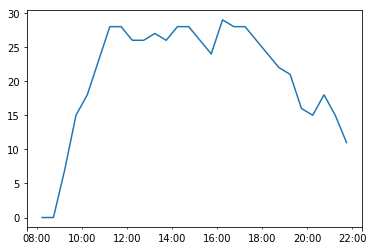

In [134]:
data1['Average'].plot()